# Presentation - Nhóm 2

### Big Data Applications: Machine Learning at Scale

### Đề tài: Music recommendation system

### GV: Quách Đình Hoàng


### Members:

1. Nguyễn Anh Đắc - 19133020

2. Nguyễn Thanh Tân Kỷ - 19133031

3. Đào Thị Cẩm Tiên - 19133055

4. Lại Hữu Trác - 19133059

### Phần 1: Lý do chọn đề tài

- Mục đích của nhóm khi chọn đề tài tạo ra một hệ thống đề xuất bài hát là để người dùng có thể dễ dàng tiếp cận với các bài hát phù hợp với sở thích của mình.

### Phần 2: Giới thiệu về dataset

- Million Song là một bộ dữ liệu gồm các tính năng và siêu dữ liệu âm thanh được cung cấp miễn phí cho một triệu bản nhạc nổi tiếng đương thời.
- Bộ dữ liệu Million Song bắt đầu là một dự án hợp tác giữa The Echo Nest và LabROSA. Nó được hỗ trợ một phần bởi NSF.
    + Dataset Source: http://labrosa.ee.columbia.edu/millionsong/
    + Paper: http://ismir2011.ismir.net/papers/OS6-1.pdf
- Nhóm sẽ không sử dụng trực tiếp tập dữ liệu này, nhưng nhóm sẽ sử dụng một số phần của nó. 
    + Tập dữ liệu: Million Song - Recommendation Engines (Gồm có "10000.txt" và "song_data.csv")
    + Link dataset: https://www.kaggle.com/code/mgmarques/million-song-recommendation-engines/data 
- Tập dữ liệu về user (10000.txt) có 3 cột và 2000000 dòng chứa số lượt phát của người dùng ẩn danh cho các bài hát có trong tập dữ liệu triệu bài hát
    + user_id: ID của người dùng
    + song_id: ID của bài hát
    + listen_count: Lượt nghe của bài hát
- Tập dữ liệu về bài hát (song_data.csv) có 5 cột và 1000000 dòng chứa các thuộc tính của một triệu bài hát
    + song_id: ID của bài hát
    + title: Tên bài hát
    + release: Tên ablum của bài hát đó (
    + artist_name: Tên nghệ sĩ, ca sĩ
    + year: Năm bài hát được phát hành

### Các mục tiêu về đề tài của nhóm:

1. Các nhạc sĩ đang thịnh hành
2. Hiện thị top các bài hát đang thịnh hành trên hệ thống
3. Tạo một hệ thống đề xuất các bài hát cho người dùng dựa vào số lượng lượt nghe của các bài hát

### Phương pháp và thuật toán sử dụng:
https://phamdinhkhanh.github.io/2019/11/04/Recommendation_Compound_Part1.html
+ Có 3 cách tiếp cận hệ thống gợi ý:

        + Content-based: Đưa ra các khuyến nghị mua bán cho người dùng dựa trên nội dung liên quan đến sản phẩm. Chẳng hạn một bài hát với các đặc điểm như: người biểu diễn , năm phát hành, thể loại,...
        
        + Collaborative filtering: Hay còn gọi là lọc cộng tác, sử dụng sự tương tác qua lại trong hành vi mua sắm giữa các khách hàng để tìm ra sở thích của một khách hàng đổi với một sản phẩm. Từ đó sẽ khuyến nghị sản phẩm cho khách hàng dựa trên hành vi của các khách hàng khác liên quan nhất.

        + Kết hợp cả 2 phương pháp: Ngoài ra chúng ta cũng có thể sử dụng kết hợp cả 2 phương pháp trên để tạo thành một thuật toán kết hợp. Ưu điểm của phương pháp này đó là vừa tận dụng được các thông tin từ phía sản phẩm và các thông tin về hành vi mua sắm của người dùng.
        
+ Nhóm em sẽ thực hiện theo cách tiếp cận Collaborative filtering - xây dựng hệ thống gợi ý dựa trên các ngươi dùng tương đồng.
+ Thuật toán sử dụng:
Alternating least squares (bình phương tối thiểu xen kẽ)
+ Độ đo: RMSE


##  1. Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data_song = pd.read_csv("song_data.csv")
data_song.columns

Index(['song_id', 'title', 'release', 'artist_name', 'year'], dtype='object')

In [3]:
# 3 dòng đầu tiên:
data_song.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
data_song.shape

(1000000, 5)

In [5]:
data_song.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


In [6]:
data_user = pd.read_csv('10000.txt', sep='\t', header=None)
data_user.columns = ['user_id', 'song_id', 'listen_count']
data_user.head()


,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [7]:
data_user.shape

(2000000, 3)

In [8]:
data_song.isna().sum()
data_user=data_user.dropna()
data_song=data_song.dropna()

In [ ]:
# Count number user
print("Number users: ",len(pd.unique(data_user['user_id'])))
print("Number songs: ",len(pd.unique(data_song['song_id'])))

## 2. EDA

In [56]:
song_dataframe = pd.merge(data_user, data_song.drop_duplicates(['song_id']), on="song_id", how="left")

### Top 10 Most Popular Artists

<Figure size 2500x1500 with 0 Axes>

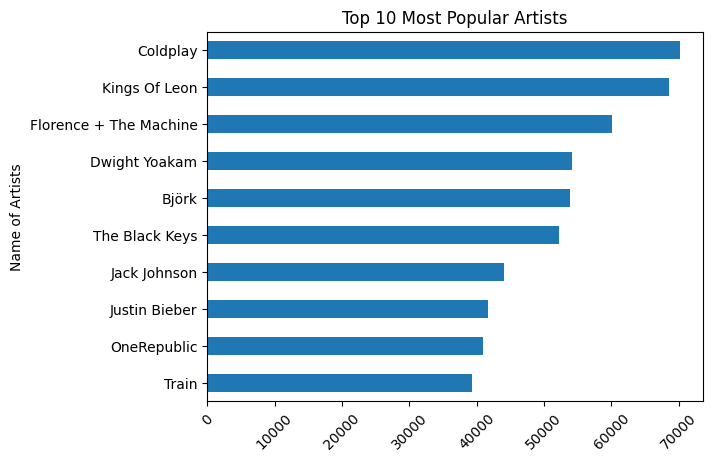

In [59]:
fig = plt.figure(figsize=(25, 15))
popular_artist = song_dataframe[['artist_name','listen_count']].groupby('artist_name').sum().\
                sort_values('listen_count', ascending=False).head(10).sort_values('listen_count')
fig = popular_artist.plot(kind='barh', title='Top 10 Most Popular Artists', legend = False)
plt.xticks(rotation = 45)
plt.ylabel('Name of Artists')
plt.show()

### Top 10 Most Popular Songs

<Figure size 2500x1500 with 0 Axes>

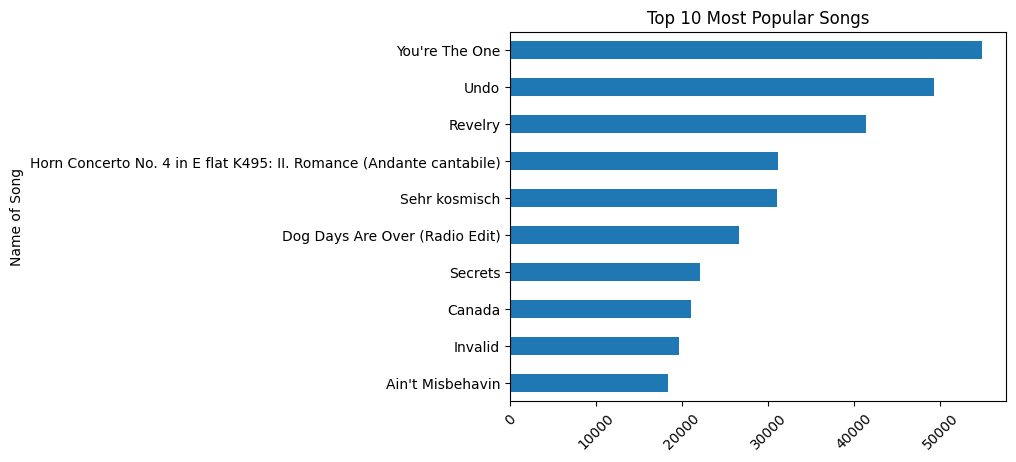

In [60]:
fig = plt.figure(figsize=(25, 15))
popular_songs = song_dataframe[['title','listen_count']].groupby('title').sum().\
                sort_values('listen_count', ascending = False).head(10).sort_values('listen_count')
fig = popular_songs.plot(kind='barh', title = 'Top 10 Most Popular Songs', legend = False)
plt.xticks(rotation= 45)
plt.ylabel('Name of Song')
plt.show()

### Top 20 Most Popular Years of Song Listen

<Figure size 2500x1500 with 0 Axes>

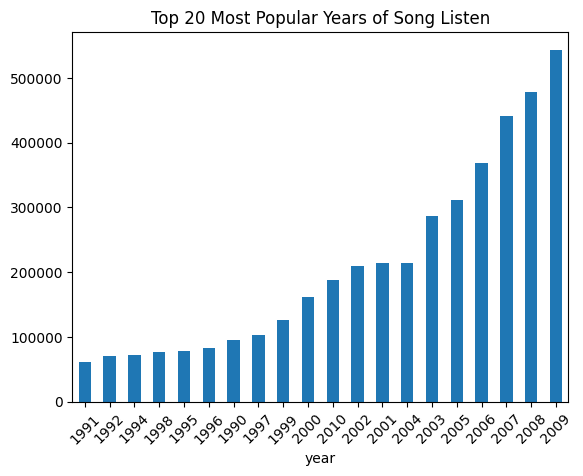

In [62]:
df1 = song_dataframe
df1 = df1.loc[~((df1['year'] == 0))]
fig = plt.figure(figsize=(25, 15))
popular_year = df1[['year','listen_count']].groupby('year').sum().\
                sort_values('listen_count', ascending = False).head(20).sort_values('listen_count')
fig = popular_year.plot(kind = 'bar', title = 'Top 20 Most Popular Years of Song Listen', legend=False)

plt.xticks(rotation = 45)
#plt.ticklabel_format(style='plain')
plt.show()

In [10]:
import findspark
findspark.init()

import pyspark
findspark.find()
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max
from pyspark.ml.feature import  StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [11]:
spark = SparkSession.builder.appName("Music_Recommend_System").getOrCreate()

In [12]:
df_listenings_agg  = spark.createDataFrame(data_user) #spark.read.text(file_path).option('header',True).option('inferSchema',True) #data frame, header will infer column types from csv
df_song= spark.createDataFrame(data_song)

D:\InstallApp\PySpark\spark-3.2.2-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [13]:
# data_user.sample(n = 20000)
df_listenings_agg = df_listenings_agg.sample(0.2,seed=123)#limit(20000)
# df_listenings_agg.select("user_id").distinct().show(10,False)

## 2. Recommend Songs for user

### 2.1 Training
####  Params of  ALS
    + rank: số lượng các yếu tố tiềm ẩn trong mô hình (10)
    + maxIter: số lần lặp tối đa (10)
    + regParam: tham số chuẩn hóa (10)

In [49]:
# Since the pyspark ML accepts only numeric input 
# => convert column from string type to numeric
old_strindexer = [StringIndexer(inputCol = col, outputCol = col + '_index').fit(df_listenings_agg) for col in list(set(df_listenings_agg.columns)- set(['count']))]
indexer = [curr_strindexer.setHandleInvalid("keep") for curr_strindexer in old_strindexer]
pipeline = Pipeline(stages = indexer)
data_p = pipeline.fit(df_listenings_agg).transform(df_listenings_agg)
data_p.select("user_id","song_id","listen_count","user_id_index","song_id_index").show(5,False)

+----------------------------------------+------------------+------------+-------------+-------------+
|user_id                                 |song_id           |listen_count|user_id_index|song_id_index|
+----------------------------------------+------------------+------------+-------------+-------------+
|b80344d063b5ccb3212f76538f3d9e43d87dca9e|SOAKIMP12A8C130995|1           |15203.0      |2244.0       |
|b80344d063b5ccb3212f76538f3d9e43d87dca9e|SODACBL12A8C13C273|1           |15203.0      |205.0        |
|b80344d063b5ccb3212f76538f3d9e43d87dca9e|SONSAEZ12A8C138D7A|1           |15203.0      |1002.0       |
|b80344d063b5ccb3212f76538f3d9e43d87dca9e|SORQHCG12A58A7EEBA|1           |15203.0      |9485.0       |
|b80344d063b5ccb3212f76538f3d9e43d87dca9e|SOVQEYZ12A8C1379D8|1           |15203.0      |3351.0       |
+----------------------------------------+------------------+------------+-------------+-------------+
only showing top 5 rows



In [18]:
# Rank: là điều quan trọng nhất vì nó xác định các yếu tố tiềm ẩn sẽ được sử dụng để lập mô hình sản phẩm và các tính năng của người dùng. 
#         Theo kinh nghiệm của tôi, các giá trị trong khoảng 50-200 hoạt động tốt cho hầu hết các trường hợp
# Vì ALS hội tụ khá nhanh nên thường không cần thay đổi tham số maxIter

#Convert type of column
data_p = data_p.withColumn("listen_count", data_p["listen_count"].cast('double'))
# Split data
seed=12314
(training,validation, test) = data_p.randomSplit([0.6,0.2,0.2],seed=seed)
print('Training: {0}, validation: {1}, test: {2}\n'.format(
  training.count(), validation.count(), test.count())
)

Training: 239790, validation: 80192, test: 79850



In [19]:
import os
from pyspark.sql.types import *
from pyspark.sql import functions as F

# Let's initialize our ALS learner
als = ALS()

# Now set the parameters for the method
als.setMaxIter(5)\
   .setSeed(seed)\
   .setItemCol("song_id_index")\
   .setRatingCol("listen_count")\
   .setUserCol("user_id_index")

reg_eval = RegressionEvaluator(predictionCol="prediction", labelCol="listen_count", metricName="rmse")

ranks = [10,20,50,100]
regParams = [0.1,0.05,0.01]
errors = [[0]*len(ranks)]*len(regParams)
models = [[0]*len(ranks)]*len(regParams)
err = 0
min_error = float('inf')
best_rank = -1
i = 0

for regParam in regParams:
    j = 0
    for rank in ranks:
        # Set the rank here:
        als.setParams(rank = rank, regParam = regParam)
        # Create the model with these parameters.
        model = als.fit(training)
        # Run the model to create a prediction. Predict against the validation_df.
        predict_df = model.transform(validation)

        # Remove NaN values from prediction (due to SPARK-14489)
        predicted_listen_count = predict_df.filter(predict_df.prediction != float('nan'))
        predicted_listen_count = predicted_listen_count.withColumn("prediction", F.abs(F.round(predicted_listen_count["prediction"],0)))
        # Run the previously created RMSE evaluator, reg_eval, on the predicted_ratings_df DataFrame
        error = reg_eval.evaluate(predicted_listen_count)
        errors[i][j] = error
        models[i][j] = model
        print ('For rank %s, regularization parameter %s the RMSE is %s' % (rank, regParam, error))
        if error < min_error:
            min_error = error
            best_params = [i,j]
        j += 1
    i += 1

als.setRegParam(regParams[best_params[0]])
als.setRank(ranks[best_params[1]])
print ('The best model was trained with regularization parameter %s' % regParams[best_params[0]])
print ('The best model was trained with rank %s' % ranks[best_params[1]])
my_model = models[best_params[0]][best_params[1]]


For rank 10, regularization parameter 0.1 the RMSE is 6.586945171228351
For rank 20, regularization parameter 0.1 the RMSE is 6.3826030447968005
For rank 50, regularization parameter 0.1 the RMSE is 6.297287620810098
For rank 100, regularization parameter 0.1 the RMSE is 6.331886547973533
For rank 10, regularization parameter 0.05 the RMSE is 7.104014530687913
For rank 20, regularization parameter 0.05 the RMSE is 6.510684999591359
For rank 50, regularization parameter 0.05 the RMSE is 6.32150319604525
For rank 100, regularization parameter 0.05 the RMSE is 6.345900324716876
For rank 10, regularization parameter 0.01 the RMSE is 9.439698519690005
For rank 20, regularization parameter 0.01 the RMSE is 6.968828236712643
For rank 50, regularization parameter 0.01 the RMSE is 6.354965192575943
For rank 100, regularization parameter 0.01 the RMSE is 6.356039216523175
The best model was trained with regularization parameter 0.1
The best model was trained with rank 50


### 2.2 Select best model and evaluate on set of test

In [20]:
# Make predictions on test 
predictions = my_model.transform(test)
predicted_test_df = predictions.filter(predictions.prediction != float('nan'))# more information for this: https://issues.apache.org/jira/browse/SPARK-14489
# Round floats to whole numbers
predicted_test_df = predicted_test_df.withColumn("prediction", F.abs(F.round(predicted_test_df["prediction"],0)))

test_RMSE = reg_eval.evaluate(predicted_test_df)

print('The model have RMSE on the test:{0}'.format(test_RMSE))


The model have RMSE on the test:6.823732568217108


In [21]:
predicted_test_df.select("user_id","song_id","prediction","listen_count").show(10,False)

+----------------------------------------+------------------+----------+------------+
|user_id                                 |song_id           |prediction|listen_count|
+----------------------------------------+------------------+----------+------------+
|1820cfffd52cad7b3af398f379524d51579655d2|SOKXHKF12A6D4F863E|13.0      |3.0         |
|22d1bec316a779b9b5cb2009718cd3b2ac7c7980|SOWTAVD12B0B8090C2|1.0       |1.0         |
|9ebbacf5dd16bb1708f7e1b59929c3bf1f601f10|SOGWJEY12AC9618862|1.0       |1.0         |
|e912c463bc307f2f8839ad184eac6d5b2dca24c6|SOHHSYJ12AB017F40A|1.0       |1.0         |
|178e43d9c4e6cfccf3a371aed3532bc0ef030f11|SOTUUWK12AB01821C6|1.0       |1.0         |
|438d8293738a2babf4e880a86a5267389bc5f901|SOFSGBJ12A8AE4645B|1.0       |1.0         |
|fe206eb14e83ebf4e8208bd177af090535049eca|SOWLCQY12A6D4F84CF|1.0       |2.0         |
|fe6824e9573c36cbd2ca499f2978c5cd98746c92|SOPSDYY12A8C13E1D2|0.0       |1.0         |
|398c496404dd09c21317a050ae4d5d848eb49273|SOJOIMC12AB0

### 2.3 Recommend for user

In [46]:
# recommend songs for user
recs_user = my_model.recommendForAllUsers(5)
recs_user.show(5,False)

+-------------+----------------------------------------------------------------------------------------------+
|user_id_index|recommendations                                                                               |
+-------------+----------------------------------------------------------------------------------------------+
|26           |[{8214, 111.74376}, {8003, 70.00746}, {7693, 53.893803}, {4958, 41.137005}, {7781, 40.067047}]|
|27           |[{3749, 44.985424}, {7781, 42.285076}, {7165, 22.826164}, {7530, 22.287949}, {8444, 21.45257}]|
|28           |[{8214, 87.85958}, {115, 43.02018}, {4140, 38.614113}, {7068, 34.16303}, {7568, 30.221153}]   |
|31           |[{7568, 32.777023}, {7781, 31.514816}, {1738, 30.614506}, {7530, 27.36052}, {5161, 25.455738}]|
|34           |[{5326, 51.9105}, {7568, 47.52175}, {5161, 39.267605}, {7530, 38.239445}, {1738, 36.973873}]  |
+-------------+----------------------------------------------------------------------------------------------+
o

In [27]:
def get_index_of_user_id(user_id):
    result=data_p.filter(data_p["user_id"]==user_id).select("user_id_index")
    if result.rdd.isEmpty():
        return -1
    return result.collect()[0][0]


def get_recs_for_user(recs):
    recs = recs.select("recommendations.song_id_index","recommendations.rating")
    songs=recs.select("song_id_index").toPandas().iloc[0,0]
    listencount=recs.select("rating").toPandas().iloc[0,0]
    ltc_matrix = pd.DataFrame(songs,columns=["song_id_index"])
    ltc_matrix["prediction"] = listencount
    ltc_matrix_ps = spark.createDataFrame(ltc_matrix)
    ltc_matrix_ps=ltc_matrix_ps.join(data_p.select("song_id","song_id_index").distinct(),               
                     ltc_matrix_ps.song_id_index==data_p.song_id_index
                    ,"inner"
                    ).select("song_id","prediction")
    ltc_matrix_ps=ltc_matrix_ps.withColumn("prediction", F.abs(F.round(ltc_matrix_ps["prediction"],0)))
    ltc_matrix_ps=df_song.join(ltc_matrix_ps,
                              df_song.song_id==ltc_matrix_ps.song_id, 
                              'inner').drop(ltc_matrix_ps.song_id).select("song_id","title","release","artist_name","year","prediction")
    return ltc_matrix_ps

user_id="b80344d063b5ccb3212f76538f3d9e43d87dca9e"
user_id_index=get_index_of_user_id(user_id)
if(user_id_index>-1):
    # recommend for a special user
    a=get_recs_for_user(recs_user.filter(recs_user["user_id_index"]==user_id_index))

    a.orderBy("prediction").show()



D:\InstallApp\PySpark\spark-3.2.2-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+------------------+--------------------+--------------------+--------------------+----+----------+
|           song_id|               title|             release|         artist_name|year|prediction|
+------------------+--------------------+--------------------+--------------------+----+----------+
|SOJSXJY12A8C13E32E|Clara meets Slope...|   All I Can Provide|          Clara Hill|2006|      14.0|
|SODBCUG12A67AE0927|            Heysátan|             Takk...|           Sigur Rós|2005|      15.0|
|SOERVXG12A6D4F5583|        Besame Mucho|The Best of Andre...|      Andrea Bocelli|2006|      15.0|
|SOUWZPO12A6D4F83E3|South Side (Digit...|Here Comes Louis ...|         Louis Smith|   0|      15.0|
|SOGBGZF12A6D4F6925| Beneath The Surface| Beneath The Surface|GZA/Genius / Kill...|1999|      16.0|
|SOKXVGY12A8AE4841E|               Drunk|       Confide In Me|       Kylie Minogue|1997|      16.0|
|SOZCDWG12A6D4F81E1|A Beggar On A Bea...|Beggar On A Beach...|Mike And The Mech...|1995|      17.0|


In [45]:
# recommend users for song
recs_song = my_model.recommendForAllItems(5)
recs_song.show(5,False)

+-------------+--------------------------------------------------------------------------------------------------+
|song_id_index|recommendations                                                                                   |
+-------------+--------------------------------------------------------------------------------------------------+
|26           |[{5464, 64.96053}, {18430, 62.371025}, {54538, 57.99699}, {16147, 54.97996}, {24407, 46.99305}]   |
|27           |[{10453, 66.97173}, {16070, 47.042305}, {5545, 43.97243}, {27576, 34.398697}, {31550, 31.690132}] |
|28           |[{8570, 122.97425}, {64571, 85.99643}, {16070, 39.233624}, {19396, 31.997284}, {24047, 30.012691}]|
|31           |[{108, 23.712029}, {13662, 20.94339}, {20290, 15.970385}, {23769, 12.977261}, {20071, 10.974971}] |
|34           |[{18430, 332.97678}, {41700, 79.766464}, {24407, 70.85786}, {16070, 69.58035}, {36583, 68.50278}] |
+-------------+-----------------------------------------------------------------

In [30]:
def get_index_of_song_id(song_id):
    result=data_p.filter(data_p["song_id"]==song_id).select("song_id_index")
    if result.rdd.isEmpty():
        return -1
    return result.collect()[0][0]


def get_recs_for_a_song(recs):
    recs = recs.select("recommendations.user_id_index","recommendations.rating")
    users=recs.select("user_id_index").toPandas().iloc[0,0]
    listencount=recs.select("rating").toPandas().iloc[0,0]
    ltc_matrix = pd.DataFrame(users,columns=["user_id_index"])
    ltc_matrix["prediction"] = listencount
    ltc_matrix_ps = spark.createDataFrame(ltc_matrix)
    ltc_matrix_ps=ltc_matrix_ps.join(data_p.select("user_id","user_id_index").distinct(),               
                     ltc_matrix_ps.user_id_index==data_p.user_id_index
                    ,"inner"
                    ).select("user_id","prediction")
    ltc_matrix_ps=ltc_matrix_ps.withColumn("prediction", F.abs(F.round(ltc_matrix_ps["prediction"],0)))

    return ltc_matrix_ps

song_id="SOCKSGZ12A58A7CA4B"
song_id_index=get_index_of_song_id(song_id)
if(song_id_index>-1):
    # recommend for a special song
    b=get_recs_for_a_song(recs_song.filter(recs_song["song_id_index"]==song_id_index))
    b.show(10,False)

D:\InstallApp\PySpark\spark-3.2.2-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+----------------------------------------+----------+
|user_id                                 |prediction|
+----------------------------------------+----------+
|762c6fa3791c68f5b530b91a3413a8f480df2099|40.0      |
|5244dd7f3b476a0540153a2720aac03c19c73a20|34.0      |
|99b7b94d6a8f45f674932831d17de4ec90844346|25.0      |
|422fdf853edaa22cfbf7956630d1a9d702d4072c|23.0      |
|92527b5bd39847108a05e183cbed2e3633aa40ef|25.0      |
|ce341a2d2a5ea28cc2f30d7919a1c176434e6969|22.0      |
|fc54f6bb5a9bec25874b454c5969e58a91889f4d|22.0      |
|c1a32e72a5ad7e84161f2ac990759a5734419b21|21.0      |
|0b19fe0fad7ca85693846f7dad047c449784647e|17.0      |
|887c9b186223f770e483923a6995d4e1662bbf8f|17.0      |
+----------------------------------------+----------+



In [31]:
#  my_model.save("./model_recommend_song_for_user")

## 3. Recommend artists for user

In [32]:
df_artist_listen=df_listenings_agg.join(df_song.select("song_id","artist_name").distinct(),
                       df_listenings_agg.song_id==df_song.song_id
                       ,"inner").select('user_id','artist_name', 'listen_count').groupby('user_id','artist_name').sum('listen_count').withColumnRenamed("sum(listen_count)", 'listen_count')
df_artist_listen.show()

+--------------------+--------------------+------------+
|             user_id|         artist_name|listen_count|
+--------------------+--------------------+------------+
|c9c44b6a8e8728e70...|           Seu Jorge|           3|
|8d4f1822e21f0a91f...|           Seu Jorge|           1|
|233036b55aad72c53...|        Jimi Hendrix|           1|
|39fdb665ce16d51ef...|               Feist|           3|
|39ba95440835a0c43...|           Daft Punk|           2|
|fe979a7b199de3ee8...|        The Ventures|           1|
|bb21097bd36275b07...|     Curtis Mayfield|           1|
|7bc3c518191756ab3...|         The Prodigy|           2|
|a883f0da4b362a7ca...|            Paramore|           1|
|6a944bfe30ae8d6b8...|          Ryan Adams|          43|
|cd47f11d66541dab1...|       Faith No More|          14|
|d3ea5a391823b95d2...|     Aretha Franklin|           1|
|95e8810b2f4234c90...|   The Lonely Island|           3|
|14e25113a07fe7960...|Five Finger Death...|           1|
|9442f74726a2f682c...| Simian M

### 3.1 Training for recommend artist

In [33]:
#convert column to numberic
old_strindexer = [StringIndexer(inputCol = col, outputCol = col + '_index').fit(df_artist_listen) for col in list(set(df_artist_listen.columns)- set(['count']))]
indexer = [curr_strindexer.setHandleInvalid("keep") for curr_strindexer in old_strindexer]
pipeline = Pipeline(stages = indexer)
df_artist_listen = pipeline.fit(df_artist_listen).transform(df_artist_listen)

In [51]:
df_artist_listen.select("user_id","artist_name","listen_count","user_id_index","artist_name_index").show()

+--------------------+--------------------+------------+-------------+-----------------+
|             user_id|         artist_name|listen_count|user_id_index|artist_name_index|
+--------------------+--------------------+------------+-------------+-----------------+
|c9c44b6a8e8728e70...|           Seu Jorge|         3.0|      18994.0|           1627.0|
|8d4f1822e21f0a91f...|           Seu Jorge|         1.0|        801.0|           1627.0|
|233036b55aad72c53...|        Jimi Hendrix|         1.0|      13319.0|            397.0|
|39fdb665ce16d51ef...|               Feist|         3.0|        877.0|            160.0|
|39ba95440835a0c43...|           Daft Punk|         2.0|       2775.0|              5.0|
|fe979a7b199de3ee8...|        The Ventures|         1.0|      68615.0|           1734.0|
|bb21097bd36275b07...|     Curtis Mayfield|         1.0|       1108.0|           2149.0|
|7bc3c518191756ab3...|         The Prodigy|         2.0|       6577.0|            240.0|
|a883f0da4b362a7ca...

In [35]:
#convert col(listen_count) to double
df_artist_listen = df_artist_listen.withColumn("listen_count", df_artist_listen["listen_count"].cast('double'))
seed=12314
# Split data
(training,validation, test) = df_artist_listen.randomSplit([0.6,0.2,0.2],seed=seed)
print('Training: {0}, validation: {1}, test: {2}\n'.format(
  training.count(), validation.count(), test.count())
)

Training: 205371, validation: 68602, test: 68477



In [36]:
import os
from pyspark.sql.types import *
from pyspark.sql import functions as F

# Let's initialize our ALS learner
als = ALS()

# Now set the parameters for the method
als.setMaxIter(5)\
   .setSeed(seed)\
   .setItemCol("artist_name_index")\
   .setRatingCol("listen_count")\
   .setUserCol("user_id_index")

reg_eval = RegressionEvaluator(predictionCol="prediction", labelCol="listen_count", metricName="rmse")

ranks = [10,15,20,50]
regParams = [0.1,0.05,0.01]
errors = [[0]*len(ranks)]*len(regParams)
models = [[0]*len(ranks)]*len(regParams)
err = 0
min_error = float('inf')
best_rank = -1
i = 0

for regParam in regParams:
    j = 0
    for rank in ranks:
        # Set the rank here:
        als.setParams(rank = rank, regParam = regParam)
        # Create the model with these parameters.
        model = als.fit(training)
        # Run the model to create a prediction. Predict against the validation_df.
        predict_df = model.transform(validation)

        # Remove NaN values from prediction (due to SPARK-14489)
        predicted_listen_count = predict_df.filter(predict_df.prediction != float('nan'))
        predicted_listen_count = predicted_listen_count.withColumn("prediction", F.abs(F.round(predicted_listen_count["prediction"],0)))
        # Run the previously created RMSE evaluator, reg_eval, on the predicted_ratings_df DataFrame
        error = reg_eval.evaluate(predicted_listen_count)
        errors[i][j] = error
        models[i][j] = model
        print ('For rank %s, regularization parameter %s the RMSE is %s' % (rank, regParam, error))
        if error < min_error:
            min_error = error
            best_params = [i,j]
        j += 1
    i += 1

als.setRegParam(regParams[best_params[0]])
als.setRank(ranks[best_params[1]])
print ('The best model was trained with regularization parameter %s' % regParams[best_params[0]])
print ('The best model was trained with rank %s' % ranks[best_params[1]])
recommend_artist_model = models[best_params[0]][best_params[1]]


For rank 10, regularization parameter 0.1 the RMSE is 8.08165218327163
For rank 15, regularization parameter 0.1 the RMSE is 7.71015941584906
For rank 20, regularization parameter 0.1 the RMSE is 7.687505981591465
For rank 50, regularization parameter 0.1 the RMSE is 7.410291010047718
For rank 10, regularization parameter 0.05 the RMSE is 9.063071110465904
For rank 15, regularization parameter 0.05 the RMSE is 8.270502889565895
For rank 20, regularization parameter 0.05 the RMSE is 8.121524696416477
For rank 50, regularization parameter 0.05 the RMSE is 7.479044099956255
For rank 10, regularization parameter 0.01 the RMSE is 13.464960775412163
For rank 15, regularization parameter 0.01 the RMSE is 11.127168522011923
For rank 20, regularization parameter 0.01 the RMSE is 9.583661002863463
For rank 50, regularization parameter 0.01 the RMSE is 7.562720619494225
The best model was trained with regularization parameter 0.1
The best model was trained with rank 50


### 3.2 Select best model and evaluate on set of test

In [37]:
# Make predictions on test 
predictions = recommend_artist_model.transform(test)
predicted_test_df = predictions.filter(predictions.prediction != float('nan'))# more information for this: https://issues.apache.org/jira/browse/SPARK-14489
# Round floats to whole numbers
predicted_test_df = predicted_test_df.withColumn("prediction", F.abs(F.round(predicted_test_df["prediction"],0)))

test_RMSE = reg_eval.evaluate(predicted_test_df)

print('The model have RMSE on the test:{0}'.format(test_RMSE))

The model have RMSE on the test:8.150307430069082


In [38]:
predicted_test_df = predicted_test_df.withColumn('column_condition',predicted_test_df.prediction-predicted_test_df.listen_count)
predicted_test_df.select("user_id","artist_name","prediction","listen_count").filter(predicted_test_df.listen_count>4).filter(predicted_test_df.column_condition<5).filter(predicted_test_df.column_condition>-5).show(10,False)

+----------------------------------------+-----------------------+----------+------------+
|user_id                                 |artist_name            |prediction|listen_count|
+----------------------------------------+-----------------------+----------+------------+
|edc19f85936d55d76b673d008bd2d220707af47a|The Killers            |1.0       |5.0         |
|6a944bfe30ae8d6b873139e8305ae131f1607d5f|Jonas Brothers         |7.0       |6.0         |
|6a944bfe30ae8d6b873139e8305ae131f1607d5f|The Mercury Program    |2.0       |5.0         |
|6a944bfe30ae8d6b873139e8305ae131f1607d5f|Rihanna                |2.0       |6.0         |
|6a944bfe30ae8d6b873139e8305ae131f1607d5f|Alliance Ethnik        |5.0       |7.0         |
|ee7aa84c164038c963cfd02a7e52a5598aa470c3|PJ Harvey              |2.0       |5.0         |
|ee7aa84c164038c963cfd02a7e52a5598aa470c3|Orishas                |3.0       |5.0         |
|ee7aa84c164038c963cfd02a7e52a5598aa470c3|The Roots / Erykah Badu|4.0       |5.0         |

### 3.3 Recommend for user

In [39]:
def get_index_of_user_id_for_artist(user_id):
    result=df_artist_listen.filter(df_artist_listen["user_id"]==user_id).select("user_id_index").collect()[0][0]
    return result


def get_recs_artist_for_user(recs):
    recs = recs.select("recommendations.artist_name_index","recommendations.rating")
    songs=recs.select("artist_name_index").toPandas().iloc[0,0]
    listencount=recs.select("rating").toPandas().iloc[0,0]
    ltc_matrix = pd.DataFrame(songs,columns=["artist_name_index"])
    ltc_matrix["prediction"] = listencount
    ltc_matrix_ps = spark.createDataFrame(ltc_matrix)
    ltc_matrix_ps=ltc_matrix_ps.join(df_artist_listen.select("artist_name","artist_name_index").distinct(),               
                     ltc_matrix_ps.artist_name_index==df_artist_listen.artist_name_index
                    ,"inner"
                    ).select("artist_name","prediction")
    ltc_matrix_ps=ltc_matrix_ps.withColumn("prediction", F.abs(F.round(ltc_matrix_ps["prediction"],0)))
    return ltc_matrix_ps

In [44]:
#recommend artists for user
recs_user = recommend_artist_model.recommendForAllUsers(5)
recs_user.show(5,False)

+-------------+--------------------------------------------------------------------------------------------+
|user_id_index|recommendations                                                                             |
+-------------+--------------------------------------------------------------------------------------------+
|26           |[{2588, 70.63269}, {3275, 65.24364}, {479, 61.141174}, {1313, 39.12685}, {1245, 32.891277}] |
|27           |[{2756, 236.82094}, {834, 94.55748}, {3039, 71.32569}, {917, 68.5653}, {264, 65.3878}]      |
|28           |[{1399, 83.59966}, {2756, 60.221848}, {2200, 54.727703}, {264, 54.401443}, {973, 53.623623}]|
|31           |[{834, 49.842453}, {917, 49.044624}, {2404, 46.608}, {2455, 40.25388}, {2256, 37.574635}]   |
|34           |[{264, 132.89822}, {2657, 82.539764}, {1780, 82.40706}, {1400, 74.47216}, {1916, 73.03519}] |
+-------------+--------------------------------------------------------------------------------------------+
only showing top 5 

In [47]:
recs_user = recommend_artist_model.recommendForAllUsers(5)
user_id="b80344d063b5ccb3212f76538f3d9e43d87dca9e"
user_id_index=get_index_of_user_id_for_artist(user_id)

# recommend for a special user
a=get_recs_artist_for_user(recs_user.filter(recs_user["user_id_index"]==user_id_index))

a.orderBy("prediction").show()

D:\InstallApp\PySpark\spark-3.2.2-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+--------------------+----------+
|         artist_name|prediction|
+--------------------+----------+
|Scottish Chamber ...|      15.0|
|      Horse The Band|      15.0|
|       Vienio & Pele|      16.0|
|            Savatage|      24.0|
|     The Futureheads|      25.0|
+--------------------+----------+

